<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Priority_Aid_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering the Countries by using Unsupervised Learning for HELP International**

**HELP International** is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
Strategic Aid Allocation: Identifying High-Priority Countries for HELP International

### **Problem Statement:**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

Our objective is to categorise the countries using socio-economic and health factors that determine the overall development of the country.


**Aim :¶**


*   To cluster countries based on numerical features.
*   It is an Unsupervised Learning problem statement.

                      **Dataset Attributes**

•	country : Name of the country

•	child_mort : Death of children under 5 years of age per 1000 live births

•	exports : Exports of goods and services per capita. Given as %age of the GDP per capita

•	health : Total health spending per capita. Given as %age of GDP per capita

•	imports : Imports of goods and services per capita. Given as %age of the GDP per capita

•	Income : Net income per person

•	Inflation : The measurement of the annual growth rate of the Total GDP

•	life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...

•	total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...

•	gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## **EDA**

<ipython-input-15-df9599297d64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


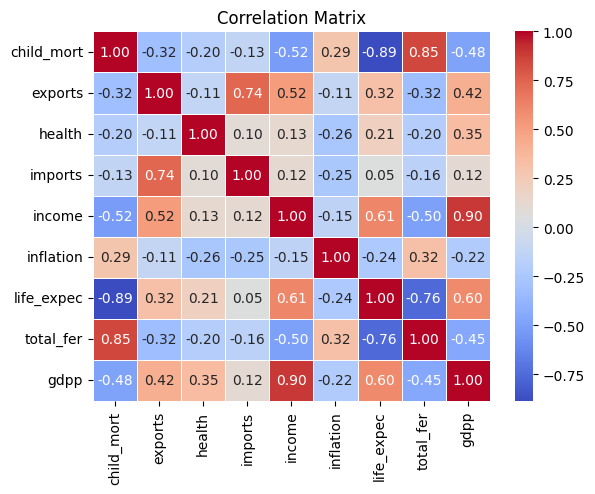

In [ ]:
correlation_matrix =df.corr()

# Visualize correlation matrix
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We can observe strong relationships squares with the orange tone between various socio-economic and health indicators:

When it comes to child mortality (child_mort), it's closely linked with a country's income and life expectancy (life_expec). Essentially, countries with higher incomes usually see lower child mortality rates and longer life expectancies. This makes sense since richer nations often have better healthcare systems and living conditions.

Child mortality also has a tight bond with GDP per capita. So, as a country's GDP per capita goes up, its child mortality rate tends to drop. This connection highlights how economic growth can lead to better healthcare outcomes for children.

Now, let's talk about the link between child mortality and the total fertility rate (total_fer). There's a positive correlation here, meaning that countries with higher fertility rates usually experience higher child mortality rates. This suggests that factors like limited access to healthcare and education, along with higher poverty rates, could be at play.

When it comes to trade, exports and imports tend to go hand in hand. If a country is exporting a lot, it's also likely importing more goods. This isn't surprising, as it reflects a country's active involvement in global trade.

Here's an uplifting connection: both income and GDP per capita have strong positive correlations with life expectancy. Essentially, countries with higher incomes tend to have longer life expectancies. It's a sign that economic prosperity often translates to better overall health outcomes.

Lastly, let's circle back to child mortality and life expectancy. It's clear that they're closely linked, with lower child mortality rates being associated with longer life expectancies. It makes sense; when children are healthier and survive into adulthood, overall life expectancy tends to increase.

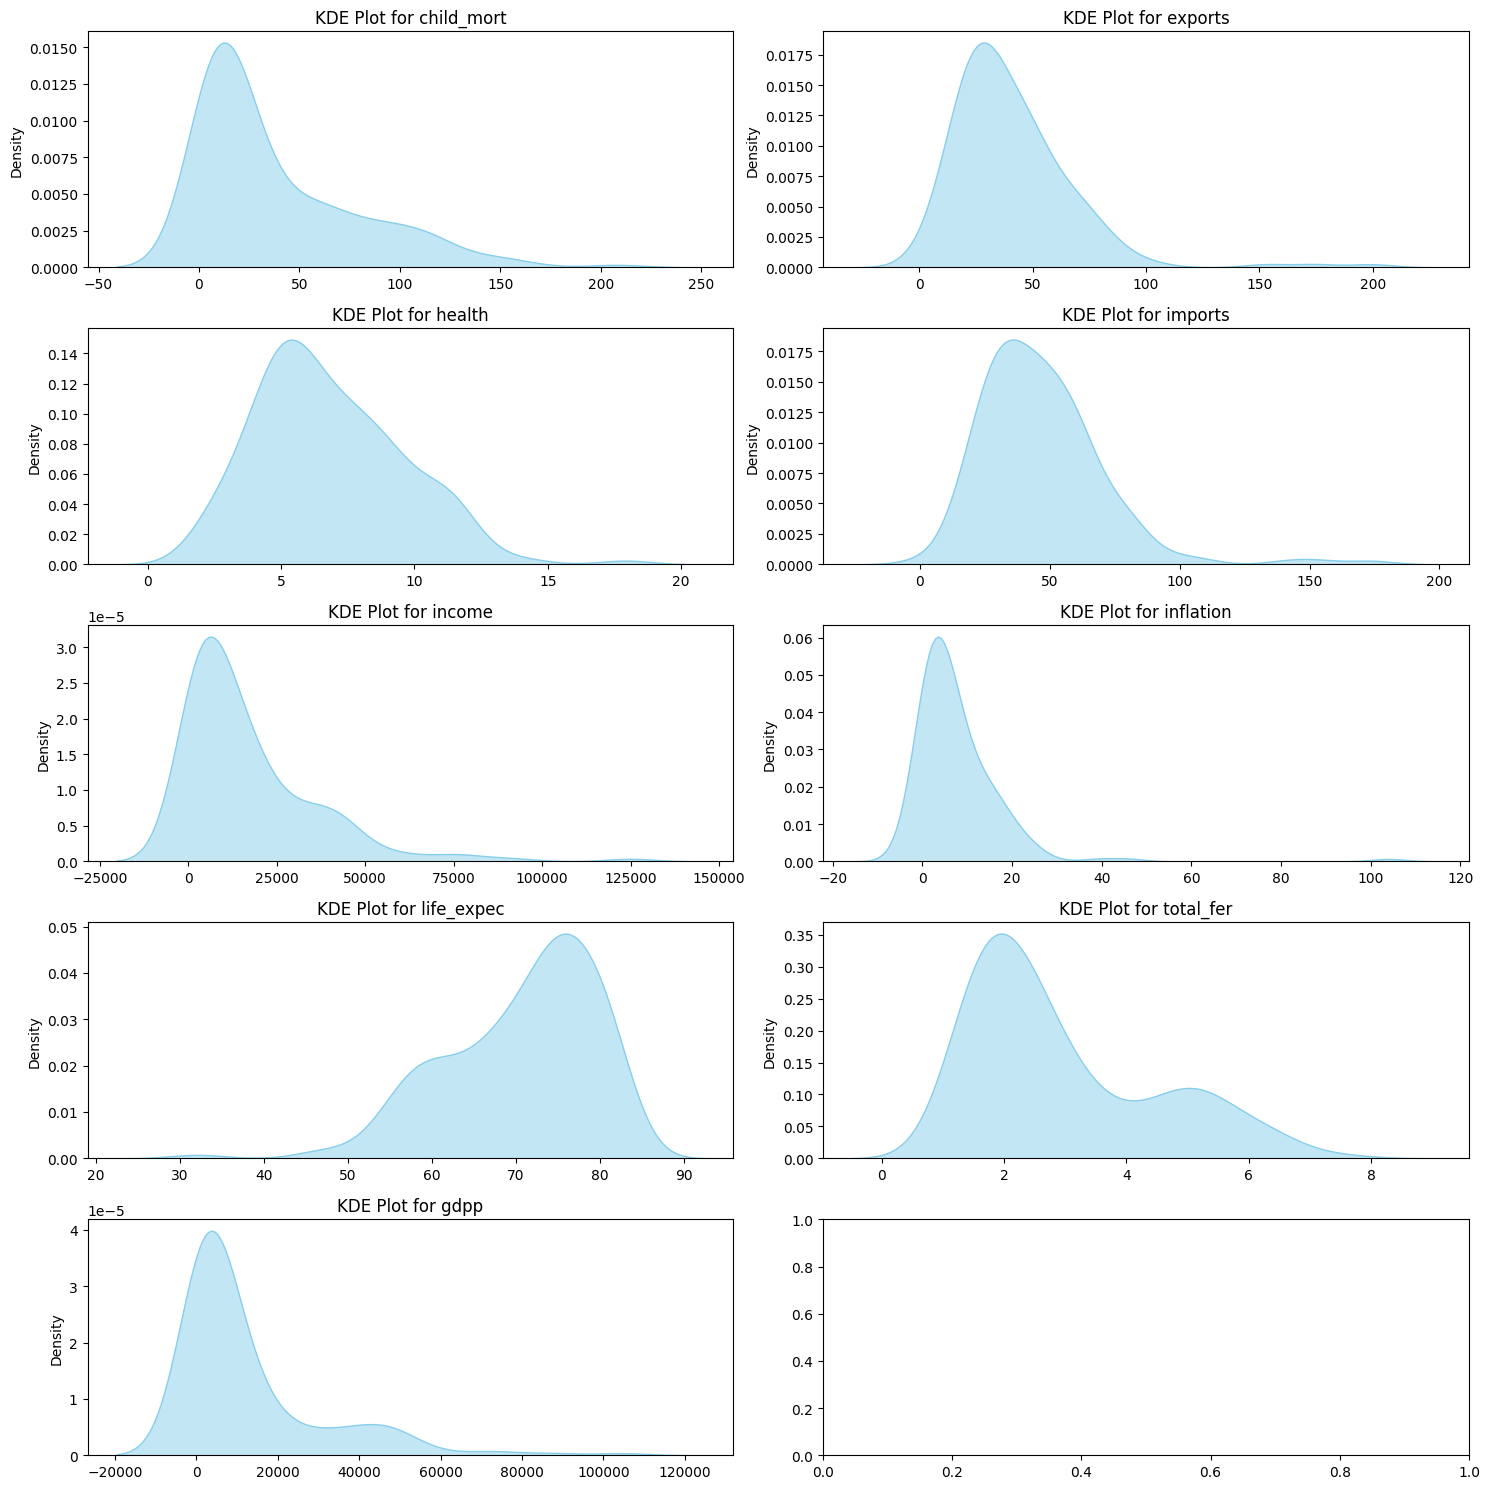

In [ ]:

# Selecting numerical features for KDE plot
numerical_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Setting up the layout for subplots
num_rows = (len(numerical_features) + 1) // 2
num_cols = 2

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to easily iterate through each subplot
axes = axes.flatten()

# Plot KDE for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=df[feature], ax=axes[i], fill=True, alpha=0.5, color='skyblue')
    axes[i].set_title(f'KDE Plot for {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show plot
plt.show()


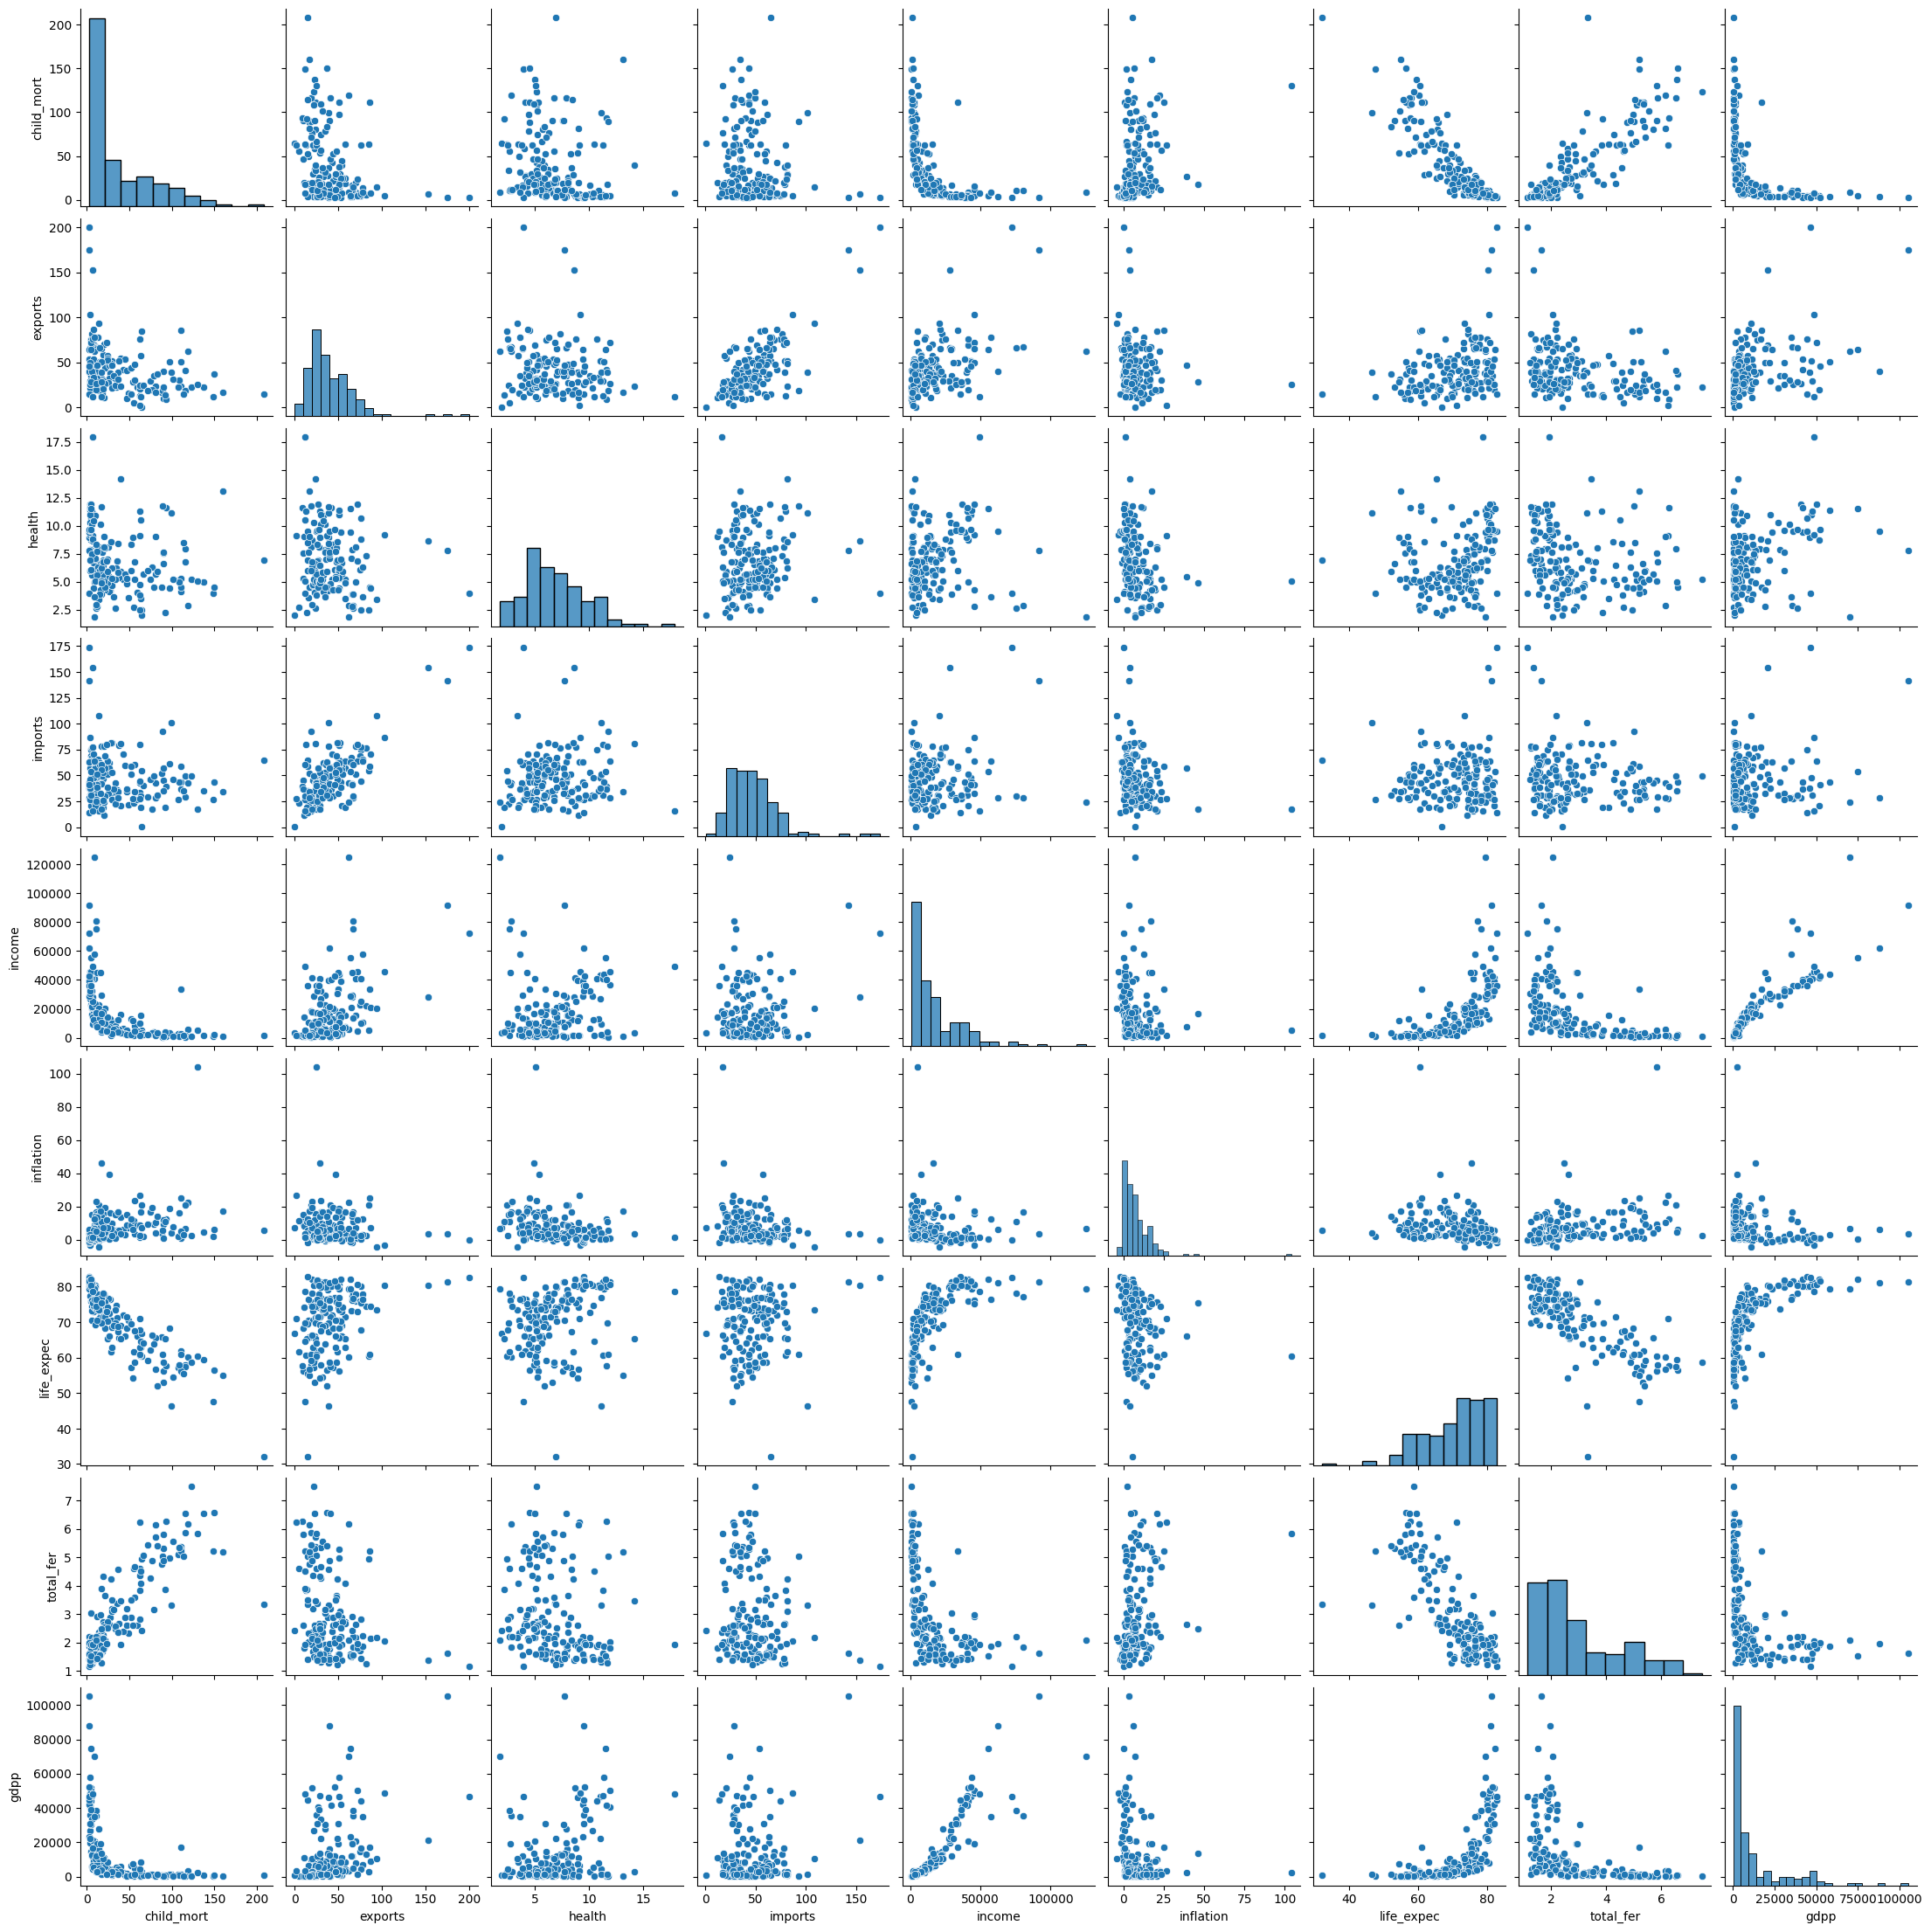

In [ ]:
sns.pairplot(df[numerical_features], height=2.5 )
plt.show()

The scatterplots vividly illustrate intricate relationships among our variables, affirming the patterns uncovered in the correlation matrix.

<ipython-input-14-721ef8ffad93>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_feature, palette='viridis')


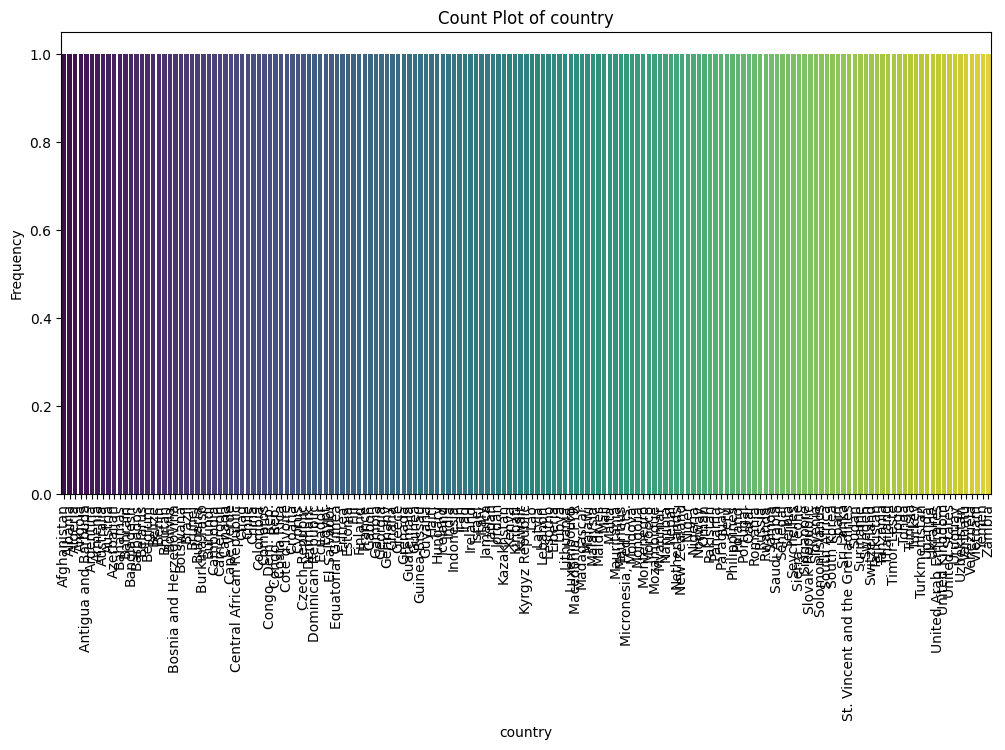

<ipython-input-14-721ef8ffad93>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x=categorical_feature, y=numerical_feature, palette='viridis')


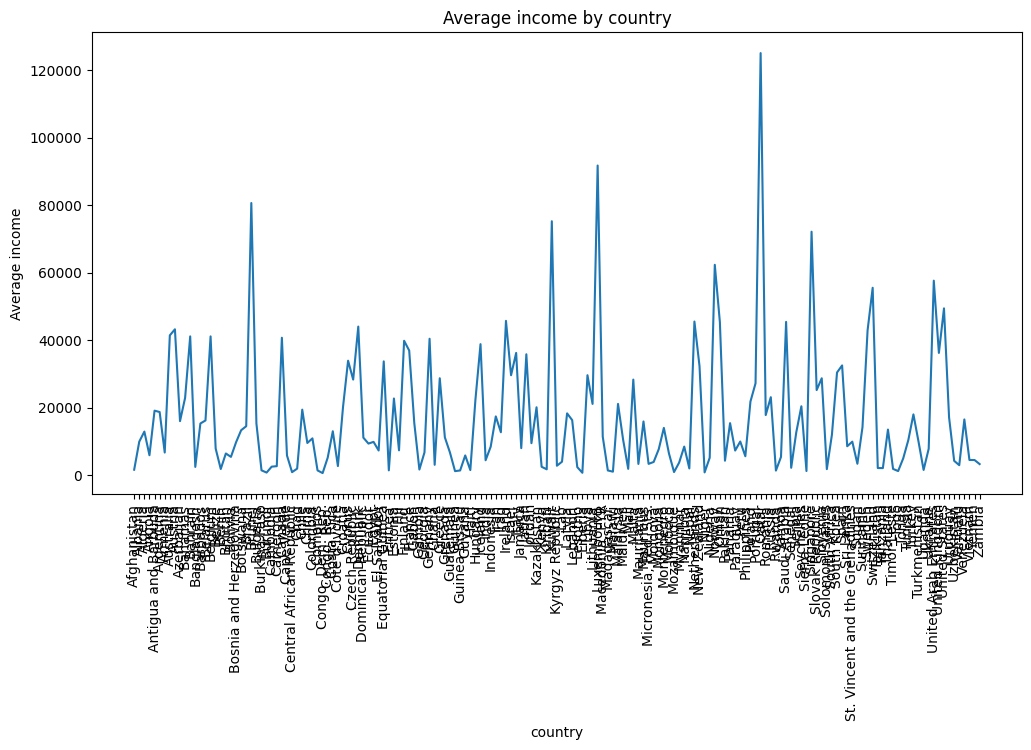

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame if different

# Categorical feature to explore (e.g., country names)
categorical_feature = 'country'

# Numerical feature for relationship analysis
numerical_feature = 'income'  # Replace with the desired numerical feature

# Plotting count plot for the categorical feature
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=categorical_feature, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f'Count Plot of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Frequency')
plt.show()

# Plotting bar plot for the relationship between categorical and numerical features
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=categorical_feature, y=numerical_feature, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f'Average {numerical_feature} by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(f'Average {numerical_feature}')
plt.show()


**Model building**

In [ ]:
X= df.copy()

Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features in X
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display the scaled dataset
X.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_feature = 'country'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical feature
X[categorical_feature] = label_encoder.fit_transform(X[categorical_feature])

# Display the transformed dataset
X.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Identify optimal k for the model using elbow method.

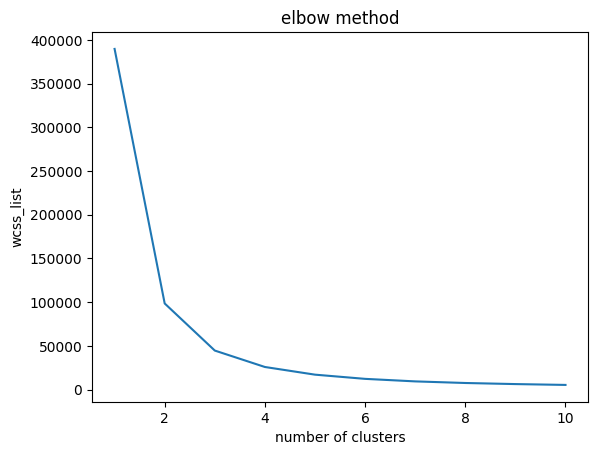

In [ ]:
from enum import auto
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init = 'auto',  random_state=42 )
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.xlabel('number of clusters')
plt.ylabel('wcss_list')
plt.title("elbow method")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Assuming you want to consider 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the maximum silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting from 2 clusters

print("Optimal number of clusters:", optimal_clusters)


Optimal number of clusters: 2


In [ ]:
kmeansmodel = KMeans(n_clusters=4, n_init = "auto",  random_state=0 )
y_predict = kmeansmodel.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg= silhouette_score(X, y_predict)

In [ ]:
silhouette_avg

0.5399025158476063

A silhouette score of 0.54 suggests that the clusters are moderately well-separated.

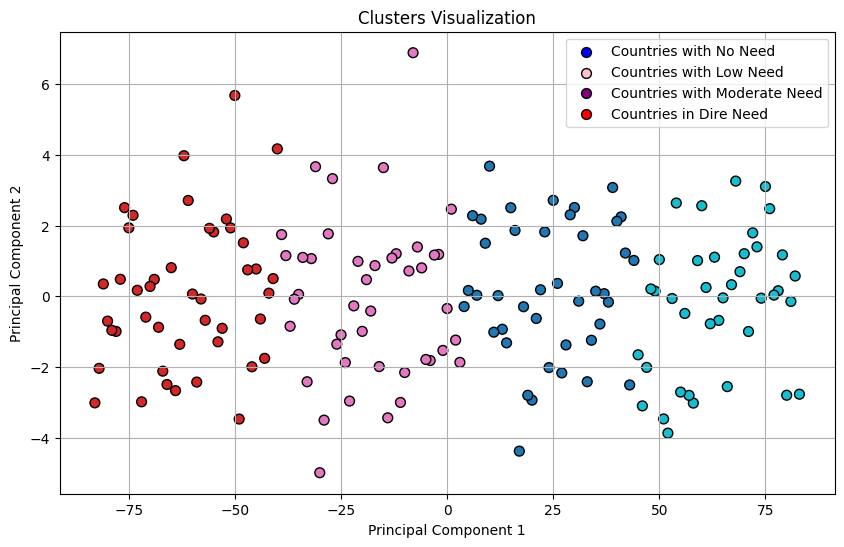

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Get cluster labels
labels = kmeansmodel.labels_

# Create a PCA object to reduce the dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', edgecolor='k', s=50)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Create a legend
# Define labels and colors for the legend
legend_labels = ['Countries with No Need','Countries with Low Need','Countries with Moderate Need' ,'Countries in Dire Need']
legend_colors = ['blue', 'pink', 'purple', 'red']

# Plot a dummy scatter plot with the same colors and labels for the legend
for cluster_label, (legend_label, legend_color) in enumerate(zip(legend_labels, legend_colors)):
    plt.scatter([], [], c=legend_color, edgecolor='k', s=50, label=legend_label)

# Display the legend
plt.legend(loc='upper right')

plt.show()


In [ ]:
# Calculate the average GDP per capita for each cluster
average_gdpp_by_cluster = df.groupby('cluster_label')['gdpp'].mean()

# Print the average GDP per capita for each cluster
print("Average GDP per Capita for Each Cluster:")
print(average_gdpp_by_cluster)

Average GDP per Capita for Each Cluster:
cluster_label
0    14993.926829
1    14017.613636
2    12059.093023
3    10639.666667
Name: gdpp, dtype: float64
